## Question answering with Data #1

**Author**: [Sayak Paul](https://sites.google.com/view/spsayakpaul)

In this study, I explore a dataset which contains information of students who got graduated from a certain college in the year 2017. I ask several questions (in an unordered fashion) to the dataset which are practical according to me and eventually find their answers. I also try to present these answers in a nice graphical way. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp 
import numpy as np
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings("ignore")

# Set jupyter's max row display
pd.set_option('display.max_row', 1000)

# Set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

plt.style.use('ggplot')
%matplotlib inline

In [2]:
data_2017 = pd.read_excel('2017_Batch.xlsx')
data_2017.head()

,SL.NO.,STUDENT'S COLLEGE ID,DEPARTMENT (ABBR.),GENDER (M/F),AGE (IN YRS.),NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,MEDIUM OF INSTRUCTION-CLASS X,Y.O.P - CLASS X,STANDARD % OF CLASS X,ACTUAL % OF CLASS X,TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS X,TOTAL MARKS OF EXAM APPEARED IN CLASS X,NAME OF EXAMINATION - CLASS XII,NAME OF BOARD/COUNCIL - CLASS XII,NAME OF SCHOOL(IN FULL) - CLASS XII,SUBJECT COMINATION (DO NOT USE ABBR.) - CLASS XII,MEDIUM OF INSTRUCTION - CLASS XII,Y.O.P - CLASS XII,STANDARD % OF CLASS XII,ACTUAL % OF CLASS XII,TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS XII,TOTAL MARKS OF EXAM APPEARED IN CLASS XII,...,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)",OVERALL YEAR GAP(S) IN ACADEMIC CAREER (YES/NO),"IF YES, MENTION THE DURATION(S) (YYYY-YYYY)",TOTAL GAP IN YEAR(S),CORE TECHNICAL STRENGTH,COMPUTER LANGUAGES KNOWN,PROJECT TITLE- INDUSTRIAL TRAINING/ V.T./ INTERNSHIP,NAME OF THE ORGANIZATION,DURATION (FROM DD/MM/YYYY TO DD/MM/YYYY),ANY SEMINARS/WORKSHOPS ATTENDED,"WORK EXPERIENCE, IF ANY (MONTHS / YEARS AS APPLICABLE)",NAME OF THE ORGANIZATION SERVED - WORK EXPERIENCE,ACHIEVEMENTS (ACADEMIC),ACHIEVEMENTS (NON ACADEMIC),CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),PERMANENT LOCATION (STATE)
0,1,1.310905e+09,AEIE,F,21,I.C.S.E,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...,RAM MOHAN MISSION HIGH SCHOOL,"ENGLISH, BENGALI, ENVIRONMENTAL EDUCATION, HIS...",ENGLISH,2011.0,86,83.28,583,700,I.S.C,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...,MANSUR HABIBULLAH MEMORIAL SCHOOL,"ENGLISH,BENGALI, MATHEMATICS,PHYSICS, CHEMISTR...",ENGLISH,2013.0,87.55,84.66,508,600.0,...,ENGLISH,8.22,8.45,8.59,9.14,8.40,8.560,NaN,NaN,NaN,NaN,NaN,MICROPROCESSOR ( 8085); DIGITAL ELCTRONICS .,C,TRAINING IN PLC AND HMI,IIATCA,04/07/2016--16/07/2016,NaN,NaN,NaN,NaN,NaN,"VT - MEJIA THERMAL POWER STATION ,DVC",PAINTING,WEST BENGAL
1,2,1.310905e+09,AEIE,F,21,"SECONDARY SCHOOL EXAMINATION,2011","B.S.E.B,PATNA",GIRLS HIGH SCHOOL,"HINDI,SANSKRIT,MATHEMATICS,SCIENCE,SOCIAL SCIE...",HINDI,2011.0,70.8,70.8,425,600,"INTERMEDIATE EXAMINATION,2013","B.S.E.B,PATNA","S.M.COLLEGE,BHAGALPUR","R B HINDI,ALTERNATIVE ENGLISH,PHYSICS ,CHEMIST...",ENGLISH,2013.0,60.40,60.40,302,500.0,...,ENGLISH,6.52,7.38,6.93,7.97,8.04,7.368,NaN,NaN,NaN,NaN,NaN,"DIGITAL ELECTRONICS CIRCUIT,MICROPROCESSOR 8085",C,TRAINING ON PLC AND HMI,IIATCA,04/07/2016--16/07/2016,NaN,NaN,NaN,NaN,NaN,PROJECT ON INSTRUMENTATION &CONTROL SYSTEM,NaN,BIHAR
2,3,1.310905e+09,AEIE,M,20,ALL INDIA SENIOR SECONDARY EXAMINATION,CENTRAL BOARD OF SECONDARY EDUCATION,"J L M MEMORIAL SR. SEC. SCHOOL DIGWADIH, DHANBAD","HINDI COURSE-A, MATHEMATICS, SCIENCE, SOCIAL S...",ENGLISH,2010.0,85.5,83.6,NaN,NaN,ALL INDIA SENIOR SCHOOL CERTIFICATE EXAM,CBSE,R K S VIDIYA MANDIR DHANSAR DHANBAD,"ENGLISH CORE, MATHEMATICS, PHYSICS, CHEMISTRY,...",ENGLISH,2012.0,86.60,84.00,504,600.0,...,ENGLISH,8.22,7.93,7.89,7.83,8.44,8.062,NaN,NaN,YES,2012-2013,NaN,"INDUSTRIAL INSTRUMENTATION, PROCESS CONTROL-1",C,PLC AND HMI,IIATCA,04/07/2016--16/07/2016,NaN,NaN,NaN,NaN,NaN,VOCATIONAL TRAINING AT HEC RANCHI,NaN,JHARKHAND
3,4,1.310905e+09,AEIE,F,21,MADHYAMIK PARIKSHA,WEST BENGAL BOARD OF SECONDARY EDUCATION,BIDYA BHARATI GIRLS' HIGH SCHOOL,"BENGALI,ENGLISH, MATHEMATICS,PHYSICAL SCIENCE,...",ENGLISH,2011.0,87.38,87.38,699,800,HIGHER SECONDARY EXAMINATION,WEST BENGAL BOARD OF HIGHER SECONDARY EXAMINATION,BIDYA BHARATI GIRLS' HIGH SCHOOL,"BENGALI,ENGLISH, CHEMISTRY,MATHEMATICS, PHYSIC...",ENGLISH,2013.0,86.00,84.57,592,700.0,...,ENGLISH,8.59,8.45,9.04,9.59,9.08,8.950,NaN,NaN,NaN,NaN,NaN,"INDUSTRIAL INSTRUMENTATION, DIGITAL ELECTRONICS",C,TRAINING ON PLC AND HMI,IIATCA,04/07/2016--16/07/2016,CAMPUS TO CORPORATE' BY ISA(KOLKATA SECTION),NaN,NaN,NaN,NaN,VACATIONAL TRAINING AT CESC LIMITED; PROJECT T...,"SITAR (2ND YEAR), ARTS(completed

## 1. What is the total number of students this dataset has? 

In [3]:
data_2017.shape

(671, 64)

* 670 - The number of students. This is 1 less than 671 because 671 contains the header row as well. 
* 64 - Columns

## 2. What kind of information does this dataset convey? 

In [4]:
list(data_2017)

['SL.NO.',
 "STUDENT'S COLLEGE ID",
 'DEPARTMENT (ABBR.)',
 'GENDER (M/F)',
 'AGE (IN YRS.)',
 'NAME OF EXAMINATION - CLASS X',
 'NAME OF BOARD - CLASS X',
 'NAME OF SCHOOL(IN FULL)-CLASS X',
 'SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X',
 'MEDIUM OF INSTRUCTION-CLASS X',
 'Y.O.P - CLASS X',
 'STANDARD % OF CLASS X',
 'ACTUAL % OF CLASS X',
 'TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS X',
 'TOTAL MARKS OF EXAM APPEARED IN CLASS X',
 'NAME OF EXAMINATION - CLASS XII',
 'NAME OF BOARD/COUNCIL - CLASS XII',
 'NAME OF SCHOOL(IN FULL) - CLASS XII',
 'SUBJECT COMINATION (DO NOT USE ABBR.) - CLASS XII',
 'MEDIUM OF INSTRUCTION - CLASS XII',
 'Y.O.P - CLASS XII',
 'STANDARD % OF CLASS XII',
 'ACTUAL % OF CLASS XII',
 'TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS XII',
 'TOTAL MARKS OF EXAM APPEARED IN CLASS XII',
 'DIPLOMA STREAM',
 'DIPLOMA UNIVERSITY/BOARD/COUNCIL (IN FULL)',
 'NAME OF INSTITUTE (IN FULL) - DIPLOMA',
 'MEDIUM OF INSTRUCTION- DIPLOMA',
 'Y.O.P - DIPLOMA',
 'DIP

## 3. Are there any missing values in the dataset? 

In [5]:
data_2017.isna().sum()

SL.NO.                                                      0
STUDENT'S COLLEGE ID                                        1
DEPARTMENT (ABBR.)                                          0
GENDER (M/F)                                                0
AGE (IN YRS.)                                               0
NAME OF EXAMINATION - CLASS X                               0
NAME OF BOARD - CLASS X                                     0
NAME OF SCHOOL(IN FULL)-CLASS X                             3
SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X               3
MEDIUM OF INSTRUCTION-CLASS X                               2
Y.O.P - CLASS X                                             1
STANDARD % OF CLASS X                                       5
ACTUAL % OF CLASS X                                         5
TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS X        35
TOTAL MARKS OF EXAM APPEARED IN CLASS X                    26
NAME OF EXAMINATION - CLASS XII                            49
NAME OF 

## 4. How many departments are there in the dataset?

In [6]:
# Rename the long name without loss in its meaning
data_2017.rename(columns={'DEPARTMENT (ABBR.)': 'Department'}, inplace=True)

In [7]:
set(data_2017.Department.values)

{'AEIE', 'BME', 'CE', 'CSE', 'ECE', 'EE', 'IT', 'ME'}

* AEIE - Applied Electronics and Instrumentation Engg.
* BME - Biomedical Engg.
* CE - Civil Engg.
* CSE - Computer Science and Engg.
* ECE - Electronics and Communication Engg.
* EE - Electrical Engg.
* IT - Information Technology
* ME - Mechanical Engg.

## 5. What is the student count per department?

In [8]:
data_2017.groupby('Department')['SL.NO.'].count().reset_index(name='No. of students')

,Department,No. of students
0,AEIE,54
1,BME,24
2,CE,68
3,CSE,136
4,ECE,125
5,EE,125
6,IT,79
7,ME,60


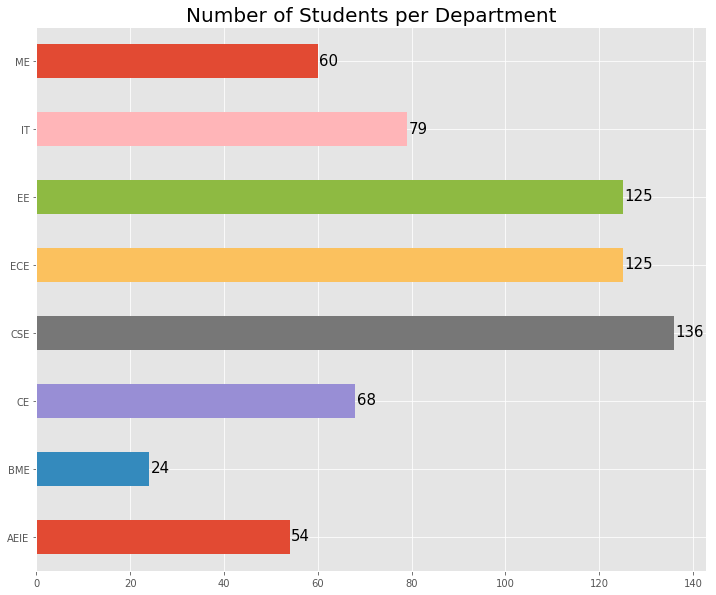

In [9]:
subplot = data_2017.groupby('Department')['SL.NO.'].count().plot(kind='barh',figsize=(12,10))
subplot.set_ylabel('')
subplot.set_title('Number of Students per Department', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.3, i.get_y()+.2, \
            str(i.get_width()), fontsize=15,)

## 6. What is the highest semester grade obtained by a student from a particular department?

In [10]:
data_2017.groupby('Department')['SEM AVG'].max().reset_index(name = 'Highest Average Semester Grade')

,Department,Highest Average Semester Grade
0,AEIE,8.950
1,BME,8.966
2,CE,9.432
3,CSE,9.540
4,ECE,9.502
5,EE,9.268
6,IT,8.726
7,ME,9.006


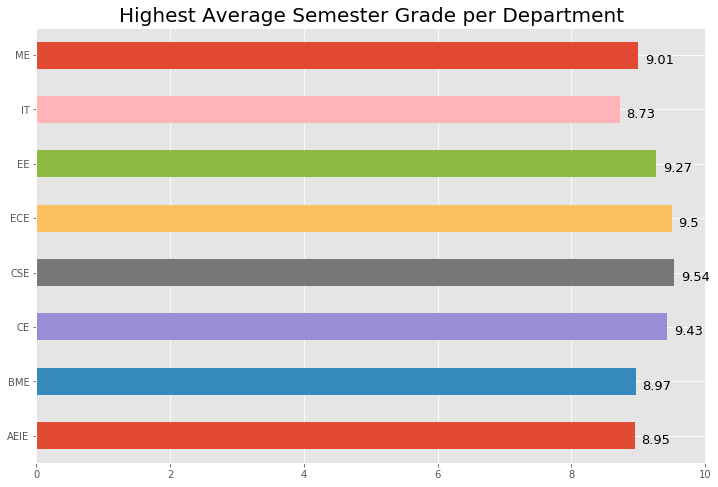

In [11]:
subplot = data_2017.groupby('Department')['SEM AVG'].max().plot(kind='barh',figsize=(12,8))
subplot.set_ylabel('')
subplot.set_title('Highest Average Semester Grade per Department', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

In [13]:
data_2017[data_2017['Department'] == 'IT'][['SEM AVG']].head()

,SEM AVG
532,7.132
533,6.826
534,8.040
535,6.610
536,7.582


## 7. Students from different states took admission in this college. What is the state-wise student count?

In [14]:
data_2017['PERMANENT LOCATION (STATE)'].value_counts()

WEST BENGAL                    480
BIHAR                           94
JHARKHAND                       44
WESTBENGAL                      18
WEST BENGAL                      6
TRIPURA                          5
West Bengal                      5
WEST-BENGAL                      3
WB                               2
 WEST BENGAL                     2
DELHI                            1
               JHARKHAND         1
                WEST BENGAL      1
WEST BENGAL.                     1
INDIA                            1
UTTARAKHAND                      1
               WEST BENGAL       1
WEST BINGAL                      1
West bengal                      1
Name: PERMANENT LOCATION (STATE), dtype: int64

For the same state **West Bengal**, we have several variants like WB, WEST-BENGAL and so on. There are even cases where several spaces are appended before the word. Let's try to give it a proper shape. Otherwise, the numbers will be faulty. We will stick to the name `WEST BENGAL` and will replace the other variants accordingly. We have this problem for other states as well. 

**Quick observation**: A candidate has even given India as his/her state)

In [15]:
# Manual engineering but okay! Can be written in an efficient manner using regex
# The correct entries have also been specified. This is to avoid the entry of NaNs. 
data_2017['PERMANENT LOCATION (STATE)'] = data_2017['PERMANENT LOCATION (STATE)'] .map({'WESTBENGAL':'WEST BENGAL',
'WEST BENGAL':'WEST BENGAL', 'West Bengal':'WEST BENGAL', 'WEST-BENGAL':'WEST BENGAL',
' WEST BENGAL':'WEST BENGAL', 'WB':'WEST BENGAL','West bengal':'WEST BENGAL', 'WEST BINGAL': 'WEST BENGAL',
'               WEST BENGAL':'WEST BENGAL', '                WEST BENGAL':'WEST BENGAL','WEST BENGAL.':'WEST BENGAL',
'               JHARKHAND':'JHARKHAND','BIHAR':'BIHAR','TRIPURA':'TRIPURA','JHARKHAND':'JHARKHAND','UTTARAKHAND':'UTTARAKHAND',
'DELHI':'DELHI','INDIA':'INDIA'})

In [16]:
no_students_state_wise = data_2017['PERMANENT LOCATION (STATE)'].value_counts().reset_index(name='Number of students')
no_students_state_wise.rename(columns={'index':'State'},inplace=True)
no_students_state_wise

,State,Number of students
0,WEST BENGAL,515
1,BIHAR,94
2,JHARKHAND,45
3,TRIPURA,5
4,UTTARAKHAND,1
5,INDIA,1
6,DELHI,1


Looks much more tidy now! Can we plot this? Of course!

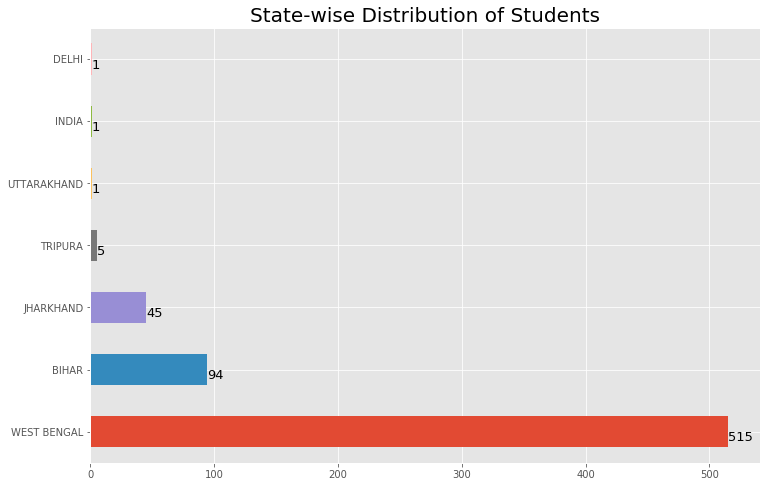

In [17]:
subplot = data_2017['PERMANENT LOCATION (STATE)'].value_counts().plot(kind='barh',figsize=(12,8))
subplot.set_ylabel('')
subplot.set_title('State-wise Distribution of Students', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

The value **India** is really becoming intolerable to my eyes. I am going drop the row corresponding to it. 

In [18]:
data_2017[data_2017['PERMANENT LOCATION (STATE)'] == 'INDIA']

,SL.NO.,STUDENT'S COLLEGE ID,Department,GENDER (M/F),AGE (IN YRS.),NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,MEDIUM OF INSTRUCTION-CLASS X,Y.O.P - CLASS X,STANDARD % OF CLASS X,ACTUAL % OF CLASS X,TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS X,TOTAL MARKS OF EXAM APPEARED IN CLASS X,NAME OF EXAMINATION - CLASS XII,NAME OF BOARD/COUNCIL - CLASS XII,NAME OF SCHOOL(IN FULL) - CLASS XII,SUBJECT COMINATION (DO NOT USE ABBR.) - CLASS XII,MEDIUM OF INSTRUCTION - CLASS XII,Y.O.P - CLASS XII,STANDARD % OF CLASS XII,ACTUAL % OF CLASS XII,TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS XII,TOTAL MARKS OF EXAM APPEARED IN CLASS XII,...,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)",OVERALL YEAR GAP(S) IN ACADEMIC CAREER (YES/NO),"IF YES, MENTION THE DURATION(S) (YYYY-YYYY)",TOTAL GAP IN YEAR(S),CORE TECHNICAL STRENGTH,COMPUTER LANGUAGES KNOWN,PROJECT TITLE- INDUSTRIAL TRAINING/ V.T./ INTERNSHIP,NAME OF THE ORGANIZATION,DURATION (FROM DD/MM/YYYY TO DD/MM/YYYY),ANY SEMINARS/WORKSHOPS ATTENDED,"WORK EXPERIENCE, IF ANY (MONTHS / YEARS AS APPLICABLE)",NAME OF THE ORGANIZATION SERVED - WORK EXPERIENCE,ACHIEVEMENTS (ACADEMIC),ACHIEVEMENTS (NON ACADEMIC),CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),PERMANENT LOCATION (STATE)
249,250,1.310901e+09,CSE,M,21,MADHYAMIK PARIKSHA,WBSE,THE SCOTTISH CHURCH COLLEGIATE SCHOOL,"BENGALI PAPER 1, BENGALI PAPER 2, ENGLISH, MAT...",BENGALI,2011.0,76.9,76.9,615,800,HIGHER SECONDARY EXAMINATION,WBCHSE,SAILENDRA SIRCAR VIDYALAYA,"BENGALI, ENGLISH, CHEMISTRY, MATHEMATICS, PHYS...",ENGLISH,2013.0,56.3,58.6,293,500.0,...,ENGLISH,7.04,7.28,7.14,6.73,7.15,7.068,NO,NaN,NO,NaN,NaN,"C, JAVA, DBMS","C, C++, JAVA, J2EE, SQL",INDUSTRIAL TRAINING ON DATABSE DESIGNING,SOUTH EASTERN RAILWAY,15/06/2015 TO 16/07/2015,"ANDROBOTIX, HACKTRACK AND FEW ON ANDROID APP D...",NaN,NaN,NaN,PERFORMED AT CHILDREN MUSIC CONFERENCE 2003 IN...,NaN,SANGEET BIVAKAR DEGREE WITH DISTINCTION IN NAJ...,INDIA


In [19]:
data_2017.drop(index=249, inplace=True)

In [20]:
data_2017[data_2017['PERMANENT LOCATION (STATE)'] == 'INDIA']

,SL.NO.,STUDENT'S COLLEGE ID,Department,GENDER (M/F),AGE (IN YRS.),NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,MEDIUM OF INSTRUCTION-CLASS X,Y.O.P - CLASS X,STANDARD % OF CLASS X,ACTUAL % OF CLASS X,TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS X,TOTAL MARKS OF EXAM APPEARED IN CLASS X,NAME OF EXAMINATION - CLASS XII,NAME OF BOARD/COUNCIL - CLASS XII,NAME OF SCHOOL(IN FULL) - CLASS XII,SUBJECT COMINATION (DO NOT USE ABBR.) - CLASS XII,MEDIUM OF INSTRUCTION - CLASS XII,Y.O.P - CLASS XII,STANDARD % OF CLASS XII,ACTUAL % OF CLASS XII,TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS XII,TOTAL MARKS OF EXAM APPEARED IN CLASS XII,...,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)",OVERALL YEAR GAP(S) IN ACADEMIC CAREER (YES/NO),"IF YES, MENTION THE DURATION(S) (YYYY-YYYY)",TOTAL GAP IN YEAR(S),CORE TECHNICAL STRENGTH,COMPUTER LANGUAGES KNOWN,PROJECT TITLE- INDUSTRIAL TRAINING/ V.T./ INTERNSHIP,NAME OF THE ORGANIZATION,DURATION (FROM DD/MM/YYYY TO DD/MM/YYYY),ANY SEMINARS/WORKSHOPS ATTENDED,"WORK EXPERIENCE, IF ANY (MONTHS / YEARS AS APPLICABLE)",NAME OF THE ORGANIZATION SERVED - WORK EXPERIENCE,ACHIEVEMENTS (ACADEMIC),ACHIEVEMENTS (NON ACADEMIC),CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),PERMANENT LOCATION (STATE)


The intended record has been successfully deleted. 

## 8. How did the toppers perform in their high school examinations?

In [22]:
toppers = data_2017.groupby('Department')['SEM AVG'].transform(max) == data_2017['SEM AVG']
data_2017[toppers][['Department', 'SEM AVG',
                    'ACTUAL % OF CLASS XII','NAME OF BOARD/COUNCIL - CLASS XII']]

,Department,SEM AVG,ACTUAL % OF CLASS XII,NAME OF BOARD/COUNCIL - CLASS XII
3,AEIE,8.950,84.57,WEST BENGAL BOARD OF HIGHER SECONDARY EXAMINATION
63,BME,8.966,81.50,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...
90,CE,9.432,92.00,COUNCIL FOR INDIAN SCHOOL CERTIFICATE EXAMINATION
238,CSE,9.540,82.72,WBCHSE
295,ECE,9.502,87.28,WEST BENGAL COUNCIL OF HIGHER SECONDARY EXAMIN...
454,EE,9.268,88.57,WBCHSE
606,IT,8.726,89.17,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...
645,ME,9.006,91.80,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...


(WEST BENGAL BOARD OF HIGHER SECONDARY EXAMINATION and WBCHSE are the same.)

We see that toppers were pretty good in terms of marks in their high-school examinations. Now, this has something to do with the **BOARD/COUNCIL** to which their schools were affiliated. Because, getting 90% from WBCHSE was actually a lot more harder than getting 90% (or above) from any other boards back then.

## 9.  How the semester grades of the toppers have changed over time?

In [23]:
data_2017[toppers][['Department','SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']]

,Department,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5
3,AEIE,8.59,8.45,9.04,9.59,9.08
63,BME,8.52,8.90,9.14,9.04,9.23
90,CE,8.78,9.38,9.62,9.62,9.76
238,CSE,9.11,9.86,9.34,9.54,9.85
295,ECE,9.22,9.72,9.72,9.23,9.62
454,EE,9.30,9.00,9.26,9.57,9.21
606,IT,7.48,8.83,8.86,9.27,9.19
645,ME,8.96,9.14,8.8,9.31,8.82


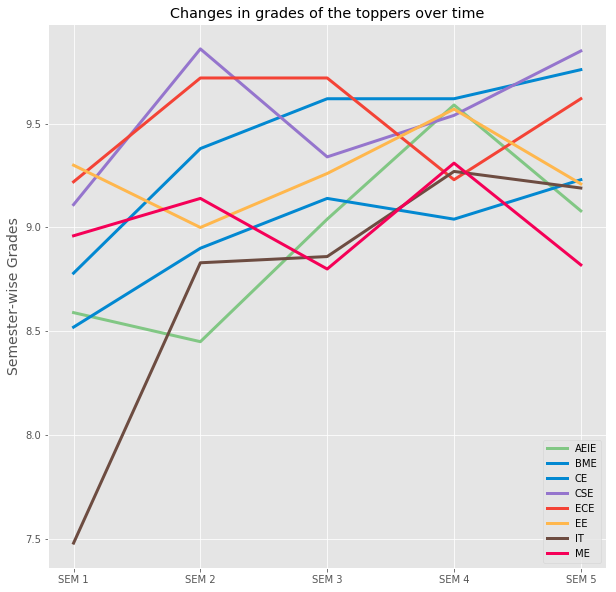

In [26]:
color=['#81c784','#0288d1','#0288d1','#9575cd','#f44336','#ffb74d','#6d4c41','#f50057']

fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('Semester-wise Grades',fontsize=14)
ax.set_title('Changes in grades of the toppers over time')
for i,c in zip(range(len(data_2017[toppers][['Department','Department','SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']])),color):
    ax.plot(['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5'], 
            data_2017[toppers][['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']].iloc[i], 
            color=c, linewidth=3,label=data_2017[toppers]['Department'].iloc[i])
    
ax.legend(loc='lower right')

Looks like someone from the department of **IT** has really improved a lot. Kudos to the individual for that!

## 10. Students gave different entrance examinations to get their admissions. How many different entrance examinations are there in the dataset?


In [27]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].value_counts()

WBJEE                       533
JELET                        83
JEE-MAINS                    44
WBJEE                         3
DE-CENTRALISED ADMISSION      2
WBJEE & JEE-MAINS             1
JELET                         1
Name: NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.), dtype: int64

We have inconsistency in the data. We have dealt with a similar kind inconsistency moments back. 

In [28]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = \
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] .map({'WBJEE':'WBJEE',
'JELET':'JELET', 'JEE-MAINS':'JEE-MAINS','DE-CENTRALISED ADMISSION':'DE-CENTRALISED ADMISSION',
'WBJEE & JEE-MAINS':'WBJEE & JEE-MAINS'})

In [29]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].value_counts()

WBJEE                       533
JELET                        83
JEE-MAINS                    44
DE-CENTRALISED ADMISSION      2
WBJEE & JEE-MAINS             1
Name: NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.), dtype: int64

In [31]:
data_2017[data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].isna()==True]\
[['Department','NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)']]

,Department,NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)
130,CE,NaN
156,CSE,NaN
226,CSE,NaN
515,EE,NaN
581,IT,NaN
586,IT,NaN
617,ME,NaN


It turns out some the students did not specify their entrance examination details. So, we will have to ignore them. From manual inspection of the dataset I found the departments of the following students. 

In [32]:
data_2017.ix[130, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'JELET'
data_2017.ix[581, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'WBJEE'
data_2017.ix[586, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'WBJEE'
data_2017.ix[617, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'WBJEE'

In [33]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].value_counts()

WBJEE                       536
JELET                        84
JEE-MAINS                    44
DE-CENTRALISED ADMISSION      2
WBJEE & JEE-MAINS             1
Name: NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.), dtype: int64

There are total 84 **lateral** candidates. 

> A number of students have got backlogs throughout their coursework. What is the total number of backlogs in each of the departments?

## 11. What is the total number of backlogs in each of the departments?

In [34]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(20)

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
127,2
620,4
409,4
647,1
82,4
92,1
324,-
80,1
593,1
289,-


The noise is real here. Some students have specified the subjects in which they got their backlogs instead of specifying numbers. Some specified 'N/A', '-', 'NO', 'NIL' and so on to denote that they did not get any backlogs. While the instruction for non-backlog candidates was to not specify anything and leave the field as it is. 

There are many ways to fix this. We will explore a one or two - 

In [35]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.isalnum()==True]\
    [['IF YES, MENTION NUMBER OF BACKLOG(S)']]

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
76,M302
77,M302
264,NIL
425,NO
460,NO
562,ONE
583,NO


In [36]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[a-zA-Z0-9]+$')==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']]

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
33,"2ND SEM- MATHEMATICS II , BASIC COMPUTATION AN..."
74,1.MATHEMATICS-III
211,"PHYSICS-II,MICROPROCESSOR,DISCRETE MATHEMATICS"
212,DISCREATE MATH
289,-
324,-
404,-
554,N.A
607,-


In [37]:
data_2017.iloc[33]['IF YES, MENTION NUMBER OF BACKLOG(S)']

'2ND SEM- MATHEMATICS II , BASIC COMPUTATION AND PRINCIPLES OF COMPUTER PROGRAMMING , ENGINEERING THERMODYNAMICS & FLUID MECHANICS,BASIC ELECTRICAL &ELECTRONICS ENGINEERING-II 3RD SEM -MATHEMATICS III'

A bit of manual engineering needed here - 

In [38]:
data_2017.ix[76, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[77, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[562, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[33, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 5
data_2017.ix[74, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[211, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 3
data_2017.ix[212, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1

In [39]:
data_2017.iloc[212][['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']]

STUDENT'S FULL NAME                     NaN
IF YES, MENTION NUMBER OF BACKLOG(S)      1
Name: 212, dtype: object

The manual engineering part is not at all the best of options as it is not scalable. As the data is small, we could go for it. But there are in deed efficient to resolve this type of problems. 

Now we need to run a bunch of tests to be sure that we have dealt with the backlog noise in a proper manner. 

In [40]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(20)

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
66,1
217,1
326,3
349,2
525,6
657,5
583,NO
102,1
644,5
662,7


In the above cell, we randomly sampled 20 rows. We can see there is an instance where `IF YES, MENTION NUMBER OF BACKLOG(S)` is `True`. We cannot take this type of instances into the account for calculating the number of backlog students per department. 

And this type of instances as well - 

In [41]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[a-zA-Z0-9]+$')==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']]

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
289,-
324,-
404,-
554,N.A
607,-


In [42]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[\d]')==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']]

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
264,NIL
289,-
324,-
404,-
425,NO
460,NO
554,N.A
583,NO
607,-


So we discard this instances to determine the actual number of backlog candidates from each department. 

In [43]:
false_backlog = data_2017.index[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[\d]')==False].tolist()

In [44]:
noisy_backlogs = data_2017.index[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False].tolist()

In [45]:
noisy_backlogs = set(noisy_backlogs) - set(false_backlog)

In [46]:
data_2017.ix[noisy_backlogs][['Department','IF YES, MENTION NUMBER OF BACKLOG(S)']]

,Department,"IF YES, MENTION NUMBER OF BACKLOG(S)"
522,EE,1
524,EE,1
525,EE,6
526,EE,2
15,AEIE,4
533,IT,2
23,AEIE,2
26,AEIE,1
538,IT,1
541,IT,1


In [47]:
noisy_backlogs_df = data_2017.ix[noisy_backlogs]\
                [['Department','IF YES, MENTION NUMBER OF BACKLOG(S)']]
label_counts = Counter(noisy_backlogs_df['Department'].values)
label_counts.most_common()

[('ME', 29),
 ('CSE', 27),
 ('EE', 25),
 ('ECE', 24),
 ('CE', 16),
 ('IT', 13),
 ('AEIE', 8),
 ('BME', 5)]

In [48]:
plot_df = pd.DataFrame(label_counts.most_common(),columns=['Department','Backlog Count'])
plot_df

,Department,Backlog Count
0,ME,29
1,CSE,27
2,EE,25
3,ECE,24
4,CE,16
5,IT,13
6,AEIE,8
7,BME,5


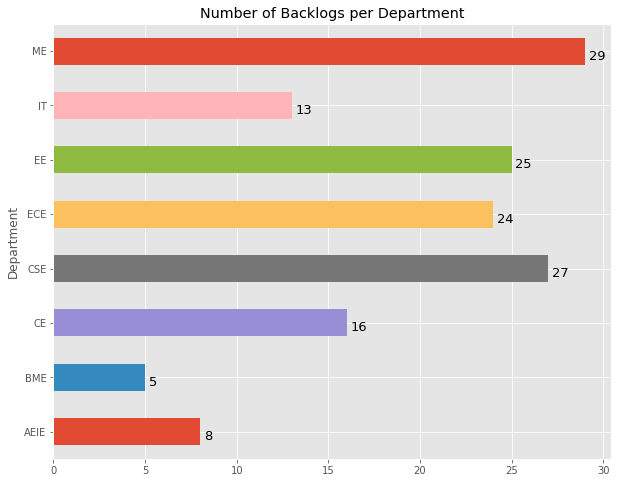

In [49]:
subplot = plot_df.groupby('Department')['Backlog Count'].sum().plot(kind='barh',figsize=(10,8))
subplot.set_title('Number of Backlogs per Department')
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.20, i.get_y()+.1, \
            str(i.get_width()), fontsize=13)

So, the department of **BME** is good enough. But there is another factor to be considered here - **Number of students per department**.

In [50]:
no_stu_dept_wise = data_2017.groupby('Department')['SL.NO.'].count().reset_index(name='Student Count')

In [51]:
no_stu_dept_wise.merge(plot_df,on='Department')

,Department,Student Count,Backlog Count
0,AEIE,54,8
1,BME,24,5
2,CE,68,16
3,CSE,135,27
4,ECE,125,24
5,EE,125,25
6,IT,79,13
7,ME,60,29


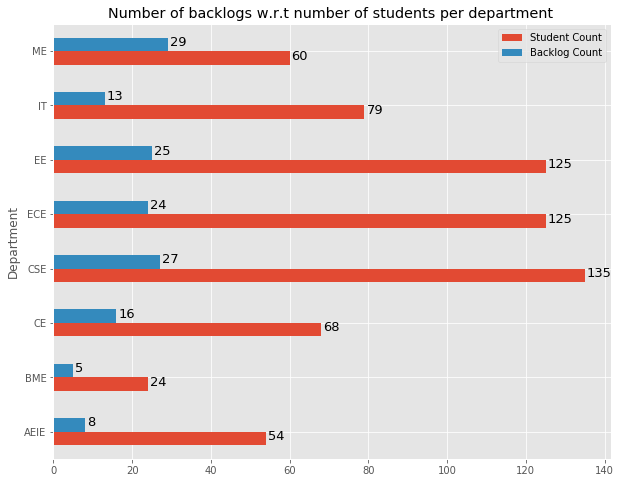

In [52]:
stu_backlog_count= no_stu_dept_wise.merge(plot_df,on='Department')
subplot = stu_backlog_count.groupby('Department').sum().plot(kind='barh',figsize=(10,8))
subplot.set_title('Number of backlogs w.r.t number of students per department ')
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.5, i.get_y()+.1, \
            str(i.get_width()), fontsize=13)

We can talk in percentages as well - 

In [53]:
stu_backlog_count['Backlog percentage'] = round((stu_backlog_count['Backlog Count'] / \
                                    stu_backlog_count['Student Count'])*100.0,2)
stu_backlog_count

,Department,Student Count,Backlog Count,Backlog percentage
0,AEIE,54,8,14.81
1,BME,24,5,20.83
2,CE,68,16,23.53
3,CSE,135,27,20.00
4,ECE,125,24,19.20
5,EE,125,25,20.00
6,IT,79,13,16.46
7,ME,60,29,48.33


The story is much more clear now. Time for another question. 

## 12. How are grades for each semester distributed?

I want to know what fraction of students belonged to what grades' range after the first semester.  

In [54]:
sem1_df = pd.DataFrame(data_2017['SEM 1'].value_counts().reset_index(name='Student Count'))
sem1_df.rename(columns={'index':'Grade'},inplace=True)
sem1_df.head(10)

,Grade,Student Count
0,7.96,15
1,7.11,14
2,8.19,14
3,7.78,14
4,6.96,14
5,7.67,13
6,7.44,13
7,6.37,12
8,7.56,12
9,7.85,11


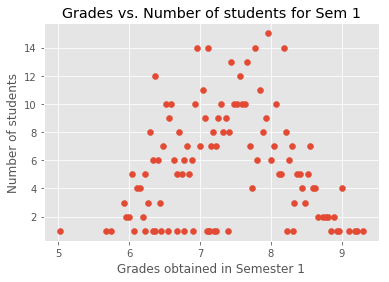

In [55]:
plt.scatter(sem1_df['Grade'],sem1_df['Student Count'])
plt.xlabel('Grades obtained in Semester 1')
plt.ylabel('Number of students')
plt.title('Grades vs. Number of students for Sem 1')
plt.show()

The plot tells us that there are total 4 candidates who got exactly 9 in their first semester. Let's verify this - 

In [56]:
len(data_2017[data_2017['SEM 1']==9])

4

True enough! Let's now see what is the total number of students who got 9 or above - 

In [57]:
len(data_2017[data_2017['SEM 1']>=9])

8

So, it turned out that the number of 9 pointers is not that high after the first semester. This happens for a lot of reasons - 
* It takes sometime for a candidate to move out from his school phase and adapt to college life in a fast fashion.
* There are subjects which are absolutely not related to particular disciplines. For example - during first semester some universities make it compulsory to study subjects like Engineering Mechanics which is absolutely not related to anything in disciplines like Information Technology. So candidates do not take much interest to study subjects like this. 

Let's now find out if the number of 9 pointers increases in the second semester or not. 

In [58]:
sem2_df = pd.DataFrame(data_2017['SEM 2'].value_counts().reset_index(name='Student Count'))
sem2_df.rename(columns={'index':'Grade'},inplace=True)
sem2_df.head(10)

,Grade,Student Count
0,8.03,12
1,7.69,12
2,7.90,12
3,7.41,12
4,7.52,11
5,8.24,11
6,7.21,11
7,8.21,11
8,8.45,11
9,7.14,10


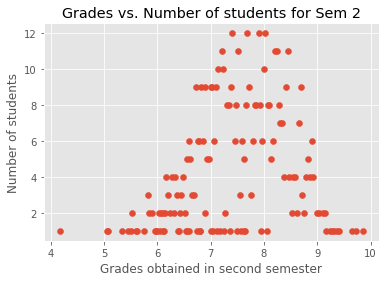

In [59]:
plt.scatter(sem2_df['Grade'],sem2_df['Student Count'])
plt.xlabel('Grades obtained in second semester')
plt.ylabel('Number of students')
plt.title('Grades vs. Number of students for Sem 2')
plt.show()

In [60]:
len(data_2017[data_2017['SEM 2']>=9])

17

> Let's now find out if the number of 9 pointers increases in the second semester or not.

- Yes, certainly!

Now, I want to plot this trend till the fifth semester. 

In [61]:
nine_pointers = []
sems = ['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']
for sem in sems:
    print(len(data_2017[data_2017[sem]>=9]))
nine_pointers

8
17


TypeError: '>=' not supported between instances of 'str' and 'int'

In [62]:
len(data_2017[data_2017['SEM 3']>=9])

TypeError: '>=' not supported between instances of 'str' and 'int'

In [63]:
data_2017['SEM 3']

0       8.59
1       6.93
2       7.89
3       9.04
4       7.85
5       7.85
6       7.44
7       8.22
8        6.7
9       7.78
10      6.22
11      7.78
12      8.22
13      6.89
14      7.93
15      6.33
16      7.33
17      7.89
18      7.41
19      7.22
20      6.89
21      7.41
22      7.19
23         6
24      7.41
25      6.93
26      6.22
27      7.56
28      7.22
29      6.78
30       7.7
31      7.48
32      6.85
33      6.11
34      7.48
35      6.33
36      7.19
37      7.11
38      6.67
39      6.74
40      7.56
41         7
42      8.85
43      7.78
44      8.07
45      7.59
46      6.89
47      8.63
48       5.7
49      7.89
50       6.7
51      5.78
52      6.15
53      7.93
54      7.72
55      7.14
56      8.31
57       7.9
58      8.31
59      8.31
60      6.97
61      7.52
62         8
63      9.14
64      8.79
65      8.24
66      7.62
67      7.66
68      6.93
69         8
70      8.03
71      7.83
72       NaN
73      8.62
74      5.55
75      6.41
76      7.23

The errors are because in some of the entries for `SEM 3` there are NaNs. For this, the column values are interpreted as strings not numbers. So we can replace these NaNs with zeros or we can drop them. 

In [64]:
sem3_without_na = data_2017['SEM 3'].dropna()
sem3_without_na = pd.to_numeric(sem3_without_na, errors = 'coerce')

In [65]:
sem3_without_na.sample(20)

77     6.85
426    8.04
172    6.66
552    7.00
564    5.72
259    8.52
576    7.55
28     7.22
644    6.63
655    7.33
141    7.41
490    6.56
0      8.59
658    7.73
621    5.40
165    6.72
193    6.00
349    6.45
6      7.44
316    7.97
Name: SEM 3, dtype: float64

In [66]:
len(sem3_without_na[lambda x: x>=9])

19

Now it will work. So, for plotting, we will have to find out the number of students that got greater or equal to 9 for a given semester and plot it accordingly. 


In [67]:
sem_1 = len(data_2017[data_2017['SEM 1']>=9])
sem_2 = len(data_2017[data_2017['SEM 2']>=9])
sem_3 = len(sem3_without_na[lambda x: x>=9])
sem_4 = len(data_2017[data_2017['SEM 4']>=9])
sem_5 = len(data_2017[data_2017['SEM 5']>=9])

nine_pointers_number = [sem_1, sem_2, sem_3, sem_4, sem_5]

Text(0.5,1,'Count of 9 pointers in each semester')

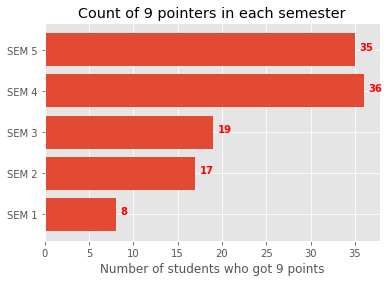

In [68]:
fig, ax = plt.subplots()
plt.barh(sems,nine_pointers_number)
for i, v in enumerate(nine_pointers_number):
    ax.text(v+0.5, i, str(v), color='red', fontweight='bold')
plt.xlabel('Number of students who got 9 points')
plt.title('Count of 9 pointers in each semester')

The value kept on increasing till fourth semester. 

Many students have specified the computer programming languages that they know (`COMPUTER LANGUAGES KNOWN` column). I want to find out the language known by highest number of students. 

## 13. What is the programming language that is known by the highest number of students?

In [69]:
prog_langs = pd.DataFrame(data_2017['COMPUTER LANGUAGES KNOWN'].value_counts().reset_index(name = 'Count'))
prog_langs.rename(columns={'index':'Programming Language'},inplace = True)
prog_langs.head(10)

,Programming Language,Count
0,C,158
1,"C,JAVA",47
2,"C, JAVA",20
3,C LANGUAGE,13
4,"C,C++",13
5,"C,C++,JAVA",13
6,C PROGRAMMING,10
7,"C,CORE JAVA",9
8,"C, C++",9
9,"C, CORE JAVA",8


The noise is real here, again. Although we can easily see that **C programming language** is the answer to my question. But what if I want to see the fourth highest language? Good amount of data cleaning is required here. 

In [70]:
prog_langs_cleaned = \
    prog_langs.set_index('Count')\
    ['Programming Language'].str.split(',', expand=True).stack()\
    .reset_index('Count')

In [71]:
prog_langs_cleaned.rename(columns={0:'Programming Language'},inplace=True)
prog_langs_cleaned.head()

,Count,Programming Language
0,158,C
0,47,C
1,47,JAVA
0,20,C
1,20,JAVA


We split the data w.r.t comma only but there can be other delimiters as well. So, finding that out will be another task in itself and it refers to the domain of text cleaning. Also, There are values which do not really conform to being computer programming languages for example - data structures, ms-office and so on. We cannot include such values. This can be for faulty data collection. 

In [72]:
prog_langs_cleaned['Programming Language'].unique()

array(['C', 'JAVA', ' JAVA', 'C LANGUAGE', 'C++', 'C PROGRAMMING',
       'CORE JAVA', ' C++', ' CORE JAVA', 'C ',
       'FUNDAMENTALS OF CORE JAVA', ' C', ' FUNDAMENTALS OF CORE JAVA',
       'C PROGRAMMING LANGUAGE', 'C+', 'PYTHON', 'HTML', 'JAVA ', 'DS',
       'FUNDAMENTALS OF JAVA', 'DATA STRUCTURE USING C',
       'CORE JAVA(FUNDAMENTALS)', 'SQL', ' FUNDAMENTALS OF JAVA',
       'AUTOCAD', 'NO', 'BASIC C;CORE JAVA', 'c', 'c++', 'java',
       ' PYTHON', 'DSA', 'M.S.OFFICE.', 'JAVA8', 'YES',
       "                            'C'", 'BASIC JAVA', ' R',
       ' VISUAL BASIC', ' SQL', ' HTML', ' CSS', ' JAVASCRIPT',
       'Data structure', ' DATASTRUCTURES', ' Java', 'C.', 'PHP & MYSQL',
       ' JQUERY', 'PYTHON.', '  JAVA', 'C-PROGAMING', 'C-PROGRAMING',
       "1. 'C'-PROGRAMMING                                                       2.JAVA",
       'C++ ', ' Core JAVA', ' Basics of PYTHON', 'JAVASCRIPT', ' PHP',
       ' MYSQL', ' C#', ' HTML ', 'CSS', 'c.java', ' php & my sql

We need some functionality that would treat words like C PROGRAMMING and C-PROGRAMMING one and the same. 
We can use **Levenshtein distance** to incorporate similarity measurement to extract the similar words. For example Programming C and C Programming means essentially the same in this context. But we can end this question here to not go out of the scope. 

With this question I end my analysis. Feel free to download the dataset and come up with your own study and let me know about that. 

Thank you for your time :-)